Copyright 2022 Andrew M. Olney, Dale Bowman and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Clustering: Problem solving

In this session, you will look at at dataset of teeth from different animals.

Each row contains the name of an animal with measurements of these variables for teeth:

| Variable | Type  | Description                    |
|:----------|:-------|:--------------------------------|
| Name     | Nominal | the name of the animal         |
| I        | Ratio | the number of top incisors     |
| i        | Ratio | the number of bottom incisors  |
| C        | Ratio | the number of top canines      |
| c        | Ratio | the number of bottom canines   |
| P        | Ratio | the number of top premolars    |
| p        | Ratio | the number of bottom premolars |
| M        | Ratio | the number of top molars       |
| m        | Ratio | the number of bottom molars    |

from *Dentition of Mammals*, Hartigan (1975), p 170.

First, you will cluster the data using hierarchical clustering (a dendrogram), followed by k-means clusters with different sizes of *g*.

## Hierarchical clustering

We need to load the data into a dataframe and manipulate it, so start with loading `readr`, `dplyr`, and `tibble`.

In [1]:
library(readr)
library(dplyr)
library(tibble)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="cGNWZf2yLi-P1]QnB2CV">readr</variable><variable id="Q*7rBeQI)ieM|X8k`C(.">dplyr</variable><variable id="6}w#YGQwcD,J-%7NN-kA">tibble</variable></variables><block type="import_R" id="90lNG/Z._SiR/*5`]~uZ" x="66" y="21"><field name="libraryName" id="cGNWZf2yLi-P1]QnB2CV">readr</field><next><block type="import_R" id="6hp+IZupict`jM2OoTu5"><field name="libraryName" id="Q*7rBeQI)ieM|X8k`C(.">dplyr</field><next><block type="import_R" id="^QxrYn(^,x?G(5,a2mOX"><field name="libraryName" id="6}w#YGQwcD,J-%7NN-kA">tibble</field></block></next></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Now read the data in `"datasets/teeth.csv"` into a dataframe, remembering that `Name` is an ID column.

In [2]:
dataframe = readr::read_csv("datasets/teeth.csv") %>%
    tibble::column_to_rownames(var="Name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="X+)2~;3F2|qEX~j9,_(/">dataframe</variable><variable id="cGNWZf2yLi-P1]QnB2CV">readr</variable><variable id="6}w#YGQwcD,J-%7NN-kA">tibble</variable></variables><block type="variables_set" id="5~MbJ0zWL`E7)bf20+Ls" x="1" y="267"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field><value name="VALUE"><block type="pipe_R" id="zW,((?rwu.eRRFs/eXVQ"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="IsFX~tiJW+-D/m+Zq9v="><mutation items="1"></mutation><field name="VAR" id="cGNWZf2yLi-P1]QnB2CV">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="ROQAV+}$rz1mX|ohtmG1"><field name="TEXT">datasets/crime.csv</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="-fy1QofP5)eK(H;y)Y9h"><mutation items="1"></mutation><field name="VAR" id="6}w#YGQwcD,J-%7NN-kA">tibble</field><field name="MEMBER">column_to_rownames</field><data>tibble:column_to_rownames</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="P[cI6b_|H|Wy0.o4Ctwi"><field name="CODE">var="City"</field></block></value></block></value></block></value></block><block type="variables_get" id="4_u._!#B195T]xt8m)]x" x="22" y="422"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field></block></xml>

Rows: 66 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Name
dbl (8): I, i, C, c, P, p, M, m

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,I,i,C,c,P,p,M,m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Opossum,5,4,1,1,3,3,4,4
Hairy_tail_mole,3,3,1,1,4,4,3,3
Common_mole,3,2,1,0,3,3,3,3
Star_nose_mole,3,3,1,1,4,4,3,3
Brown_bat,2,3,1,1,3,3,3,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Antelope,0,4,0,0,3,3,3,3
Bison,0,4,0,0,3,3,3,3
Mountain_goat,0,4,0,0,3,3,3,3


Now create a dendrogram using this dataframe.

Start by loading `cluster`.

In [3]:
library(cluster)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="wgzz(~e,OxE+7:~GeH+9">cluster</variable></variables><block type="import_R" id="HONa]gm]].B3Os=~7Cf." x="16" y="10"><field name="libraryName" id="wgzz(~e,OxE+7:~GeH+9">cluster</field></block></xml>

Now create a dendrogram using `scale` and `ward` linkage instead of `single`.  

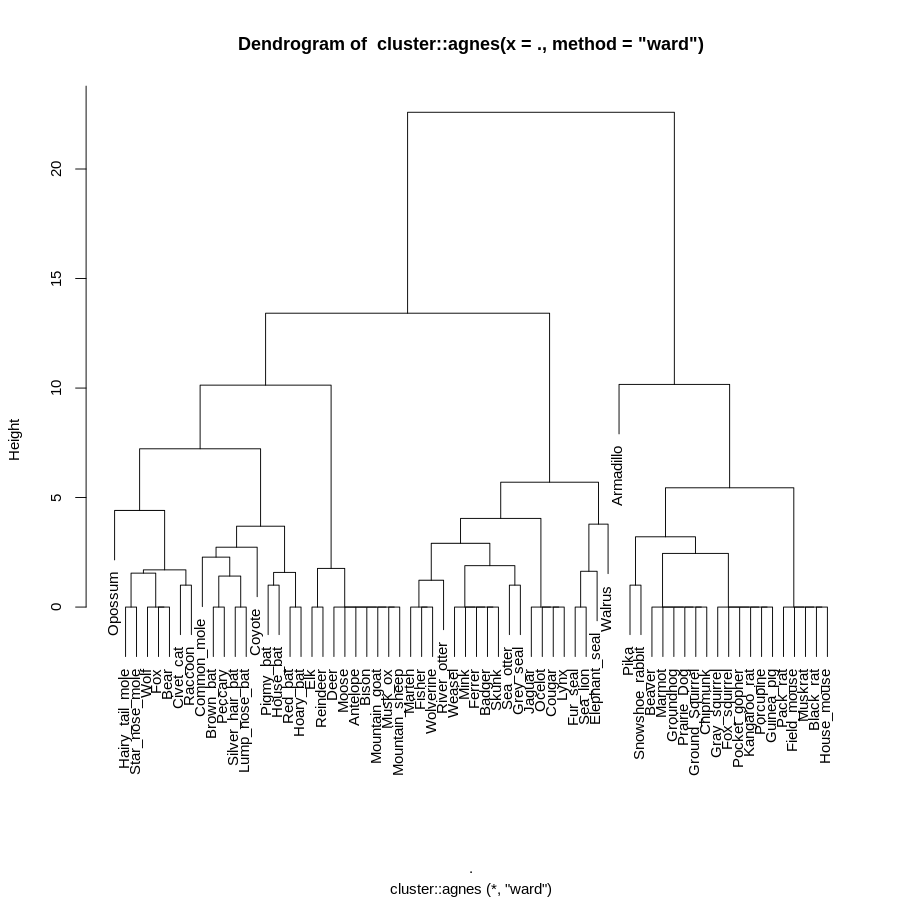

In [33]:
dataframe %>%
#     dplyr::mutate_all(scale) %>%
    cluster::agnes(method="ward") %>%
    cluster::pltree()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="X+)2~;3F2|qEX~j9,_(/">dataframe</variable><variable id="Q*7rBeQI)ieM|X8k`C(.">dplyr</variable><variable id="wgzz(~e,OxE+7:~GeH+9">cluster</variable></variables><block type="pipe_R" id="jHAlV5{ipsQ]EO/tRp=L" x="82" y="-590"><mutation items="3"></mutation><value name="INPUT"><block type="variables_get" id="[UQeS/kT/_r?O~G#jiMu"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="}?GA4HVrgv:e[.pq-Y^}"><mutation items="1"></mutation><field name="VAR" id="Q*7rBeQI)ieM|X8k`C(.">dplyr</field><field name="MEMBER">mutate_all</field><data>dplyr:mutate_all</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="O.L*{@UXhyMaO#^Y#mml"><field name="CODE">scale</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="~?/v4,rbn`SWN(`6z4wM"><mutation items="1"></mutation><field name="VAR" id="wgzz(~e,OxE+7:~GeH+9">cluster</field><field name="MEMBER">agnes</field><data>cluster:agnes</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="%w|;+B~Ne]8oF.Na:h@0"><field name="CODE">method="ward"</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="gUz#{5oWDsXSkbnC?~tp"><mutation items="1"></mutation><field name="VAR" id="wgzz(~e,OxE+7:~GeH+9">cluster</field><field name="MEMBER">pltree</field><data>cluster:pltree</data></block></value></block></xml>

If it's hard to read because of the size, hold down the `Shift` key and right click to open the image in another tab.

-----------------
**QUESTION:**

At what point on the y-axis (between 0 and 7) would you draw a horizontal line to get the best clusters?
Why wouldn't you draw it higher or lower?
How many clusters would this give you?

**ANSWER: (click here to edit)**

*About 2.5. This would group all the grazing animals together and all the rat-type animals together, the bats together, and the predators together. This would give around 17 clusters.*


-----------------

## K-means

Do K-means with this same data, using the number of clusters you identified above using the dendrogram.

*If you had more than 7 clusters, just use 7 because otherwise the plots get hard to read.*

First load `stats`, `ggplot`, and `factoextra`.

In [11]:
library(factoextra)
library(stats)
library(ggplot2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="R608IU}a7K:7On+V_t8q">factoextra</variable><variable id="=0rWMXy_)[UGAEGJ0ZtS">stats</variable><variable id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</variable></variables><block type="import_R" id="p*hu?4R9+Gp@#Y8;PHGe" x="16" y="-22"><field name="libraryName" id="R608IU}a7K:7On+V_t8q">factoextra</field><next><block type="import_R" id="?*(6%*2E-(:2_z+[?0VM"><field name="libraryName" id="=0rWMXy_)[UGAEGJ0ZtS">stats</field><next><block type="import_R" id="j(xQ~7}aQ7!;6mP5Y;3i"><field name="libraryName" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field></block></next></block></next></block></xml>

Create a kmeans model with your number of clusters and store it in a variable.

In [27]:
kmeansModel = stats::kmeans(dataframe,centers=7)

kmeansModel

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</variable><variable id="=0rWMXy_)[UGAEGJ0ZtS">stats</variable><variable id="X+)2~;3F2|qEX~j9,_(/">dataframe</variable></variables><block type="variables_set" id="6t`]9dikw6n1ejYK?p[c" x="100" y="193"><field name="VAR" id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</field><value name="VALUE"><block type="varDoMethod_R" id="8;(Y1jqa!BI0}}b#2s8/"><mutation items="2"></mutation><field name="VAR" id="=0rWMXy_)[UGAEGJ0ZtS">stats</field><field name="MEMBER">kmeans</field><data>stats:kmeans</data><value name="ADD0"><block type="variables_get" id="^;0hJQCyZ7Z-I9mGsSU^"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="XYPBLfSVg`*0u;6w%F`1"><field name="CODE">centers=7</field></block></value></block></value></block><block type="variables_get" id="97)uPz?+Id^iOg|f-ge/" x="89" y="305"><field name="VAR" id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</field></block></xml>

K-means clustering with 7 clusters of sizes 8, 20, 9, 4, 2, 9, 14

Cluster means:
     I        i         C         c        P        p        M        m
1 1.75 3.000000 1.0000000 1.0000000 2.125000 2.500000 3.000000 3.000000
2 1.05 0.950000 0.0000000 0.0000000 1.150000 0.800000 3.250000 3.250000
3 3.00 3.000000 1.0000000 0.8888889 3.777778 3.777778 2.777778 3.000000
4 3.00 3.000000 1.0000000 1.0000000 3.000000 2.000000 1.000000 1.000000
5 1.50 0.500000 1.0000000 1.0000000 3.500000 3.500000 0.500000 0.500000
6 0.00 4.000000 0.2222222 0.0000000 3.000000 3.000000 3.000000 3.000000
7 3.00 2.714286 1.0000000 1.0000000 3.500000 3.428571 1.142857 1.857143

Clustering vector:
        Opossum Hairy_tail_mole     Common_mole  Star_nose_mole       Brown_bat 
              3               3               3               3               1 
Silver_hair_bat       Pigmy_bat       House_bat         Red_bat       Hoary_bat 
              1               1               1               1               1

-----------------
**QUESTION:**

For each one of your clusters, what kind of animal does the cluster correspond to?

**ANSWER: (click here to edit)**

- 1 is bats
- 6 is grazing animals
- 2 are rats, mice, rabbits, etc

-----------------

Add the cluster assignments as a new column, `cluster` in a new dataframe.

In [28]:
df_clust = dataframe %>%
    dplyr::mutate(cluster= kmeansModel[["cluster"]])

df_clust

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="o@Af-rfK^{O!2%*ikb}G">df_clust</variable><variable id="X+)2~;3F2|qEX~j9,_(/">dataframe</variable><variable id="Q*7rBeQI)ieM|X8k`C(.">dplyr</variable><variable id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</variable></variables><block type="variables_set" id="1az~2KS~w}71;w}p2$^7" x="5" y="106"><field name="VAR" id="o@Af-rfK^{O!2%*ikb}G">df_clust</field><value name="VALUE"><block type="pipe_R" id=".f+.t)Key$XW6Q?+}8yi"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="0DwEbQDr}02,vsIfIk2V"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="0n`1s;DAo#cIux)+D^~Y"><mutation items="1"></mutation><field name="VAR" id="Q*7rBeQI)ieM|X8k`C(.">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="valueOutputCodeBlock_R" id="(%q6;GhbXoh!QxrT/ue2"><field name="CODE">cluster=</field><value name="INPUT"><block type="doubleIndexer_R" id="Q[*UJ$)-?0EGI`c~fl1i"><field name="VAR" id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</field><value name="INDEX"><block type="text" id="6Ph_ntkxQ*nk`!j=NDyw"><field name="TEXT">cluster</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="-jP?L{0^YJ4_{/+Il8r(" x="8" y="272"><field name="VAR" id="o@Af-rfK^{O!2%*ikb}G">df_clust</field></block></xml>

,I,i,C,c,P,p,M,m,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Opossum,5,4,1,1,3,3,4,4,3
Hairy_tail_mole,3,3,1,1,4,4,3,3,3
Common_mole,3,2,1,0,3,3,3,3,3
Star_nose_mole,3,3,1,1,4,4,3,3,3
Brown_bat,2,3,1,1,3,3,3,3,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Antelope,0,4,0,0,3,3,3,3,6
Bison,0,4,0,0,3,3,3,3,6
Mountain_goat,0,4,0,0,3,3,3,3,6


### Cluster plot

Plot the clustering using `factoextra`.

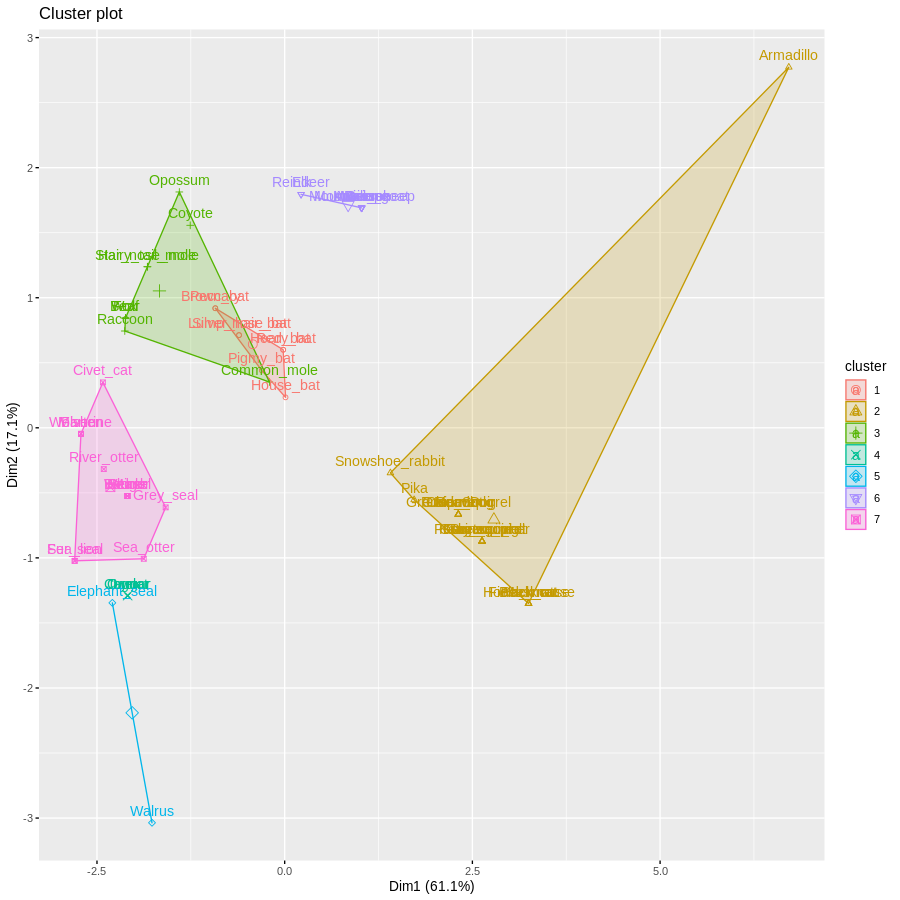

In [29]:
factoextra::fviz_cluster(kmeansModel,dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="R608IU}a7K:7On+V_t8q">factoextra</variable><variable id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</variable><variable id="X+)2~;3F2|qEX~j9,_(/">dataframe</variable></variables><block type="varDoMethod_R" id="xNS8;Do2KN.*K}-ZcKxX" x="8" y="144"><mutation items="2"></mutation><field name="VAR" id="R608IU}a7K:7On+V_t8q">factoextra</field><field name="MEMBER">fviz_cluster</field><data>factoextra:fviz_cluster</data><value name="ADD0"><block type="variables_get" id="OH329R8ITW~z,rJ+G%}8"><field name="VAR" id="q9Fdj(@HdO$x}P8?j:g1">kmeansModel</field></block></value><value name="ADD1"><block type="variables_get" id="qUJ0twKD9GXyIh3fX@Yd"><field name="VAR" id="X+)2~;3F2|qEX~j9,_(/">dataframe</field></block></value></block></xml>

-----------------
**QUESTION:**

Do you notice anything particularly interesting from this plot of the clusters?

**ANSWER: (click here to edit)**

This plot has brought marine animals together even though they had different cluster labels.

-----------------

### Scatterplots

Make 3 scatterplots

- I vs. P
- I vs. M
- P vs. M

and color the categories in each one.


Create the I vs P scatterplot, but replace `geom_smooth` with `geom_jitter()`.
This will prevent overlapping points from obscuring each other.

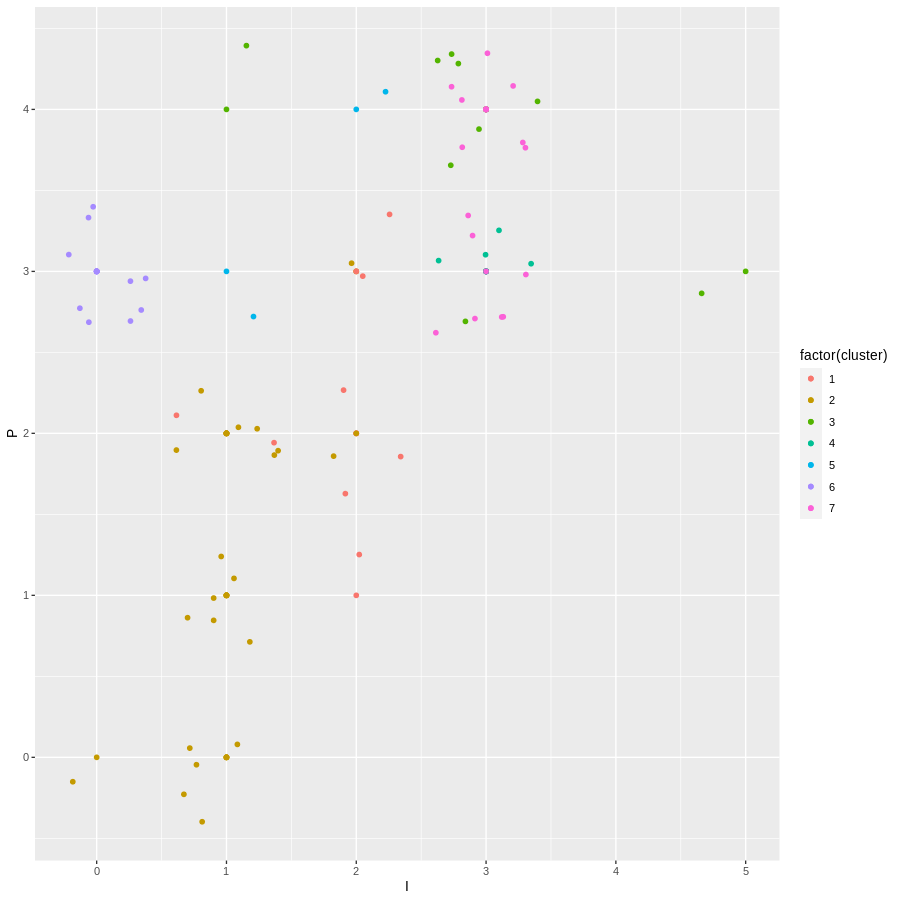

In [30]:
ggplot2::ggplot(df_clust,aes(x=I,y=P,group=cluster,color=factor(cluster))) +
    ggplot2::geom_point() +
    ggplot2::geom_jitter()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</variable><variable id="o@Af-rfK^{O!2%*ikb}G">df_clust</variable></variables><block type="ggplot_plus_R" id="L?XgN~)7%SpJF-y/;UQV" x="111" y="150"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="FnN{M,Y}C/}/P+Hun6$d"><mutation items="2"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="jFdm1{w^waLBjIUvz;Fu"><field name="VAR" id="o@Af-rfK^{O!2%*ikb}G">df_clust</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="}Ih0;eZv3hb(|nyj7m2@"><field name="CODE">aes(x=I,y=P,group=cluster,color=factor(cluster))</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="q`hgoi#V*?Irl!P;kZzI"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="J8j;}oP@L/^L(Xuy7/d7"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_jitter</field><data>ggplot2:geom_jitter</data></block></value></block></xml>

-----------------
**QUESTION:**

Mouse over each do to see what cluster it belongs to (it will be darker if there are many datapoints under it). 
Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

Well separated:

- 2: rats, mice, etc
- 6: grazing animals

The rest are mixed in with each other

-----------------

Create the I vs M scatterplot.

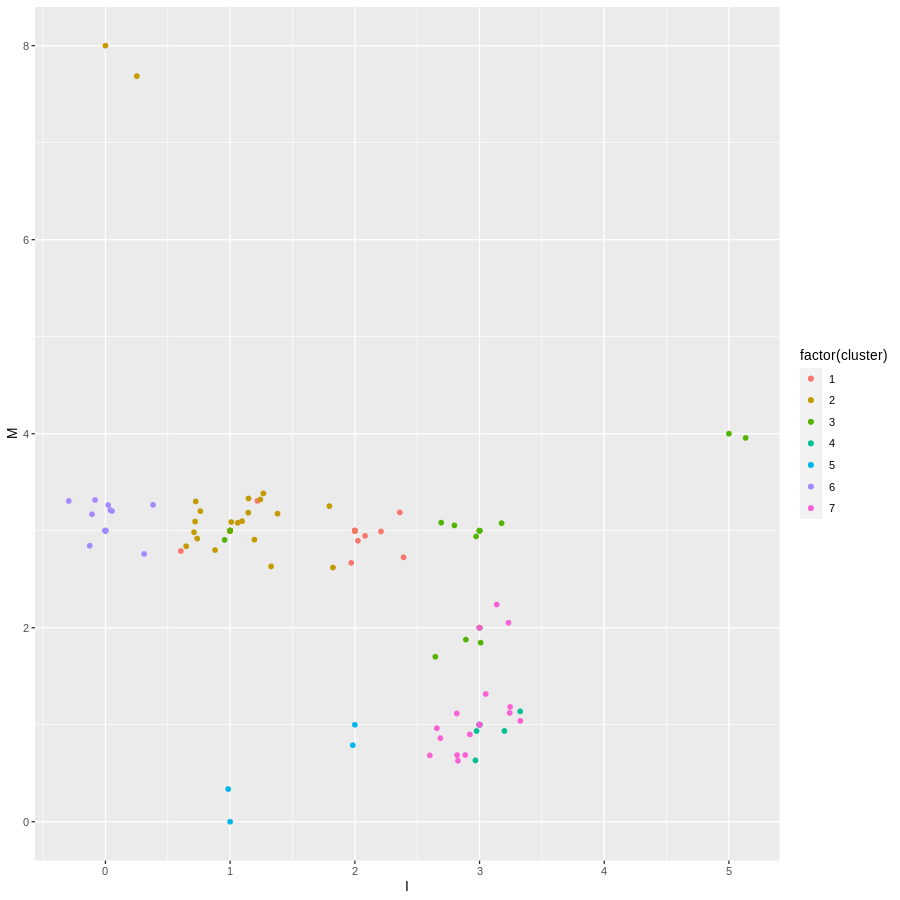

In [31]:
ggplot2::ggplot(df_clust,aes(x=I,y=M,group=cluster,color=factor(cluster))) +
    ggplot2::geom_point() +
    ggplot2::geom_jitter()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</variable><variable id="o@Af-rfK^{O!2%*ikb}G">df_clust</variable></variables><block type="ggplot_plus_R" id="L?XgN~)7%SpJF-y/;UQV" x="111" y="150"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="FnN{M,Y}C/}/P+Hun6$d"><mutation items="2"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="jFdm1{w^waLBjIUvz;Fu"><field name="VAR" id="o@Af-rfK^{O!2%*ikb}G">df_clust</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="}Ih0;eZv3hb(|nyj7m2@"><field name="CODE">aes(x=I,y=M,group=cluster,color=factor(cluster))</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="q`hgoi#V*?Irl!P;kZzI"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="J8j;}oP@L/^L(Xuy7/d7"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_jitter</field><data>ggplot2:geom_jitter</data></block></value></block></xml>

-----------------

**QUESTION:**

Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

All clusters are well separated except:

- 3: moles
- 7: weasels

-----------------

Create the P vs M scatterplot.

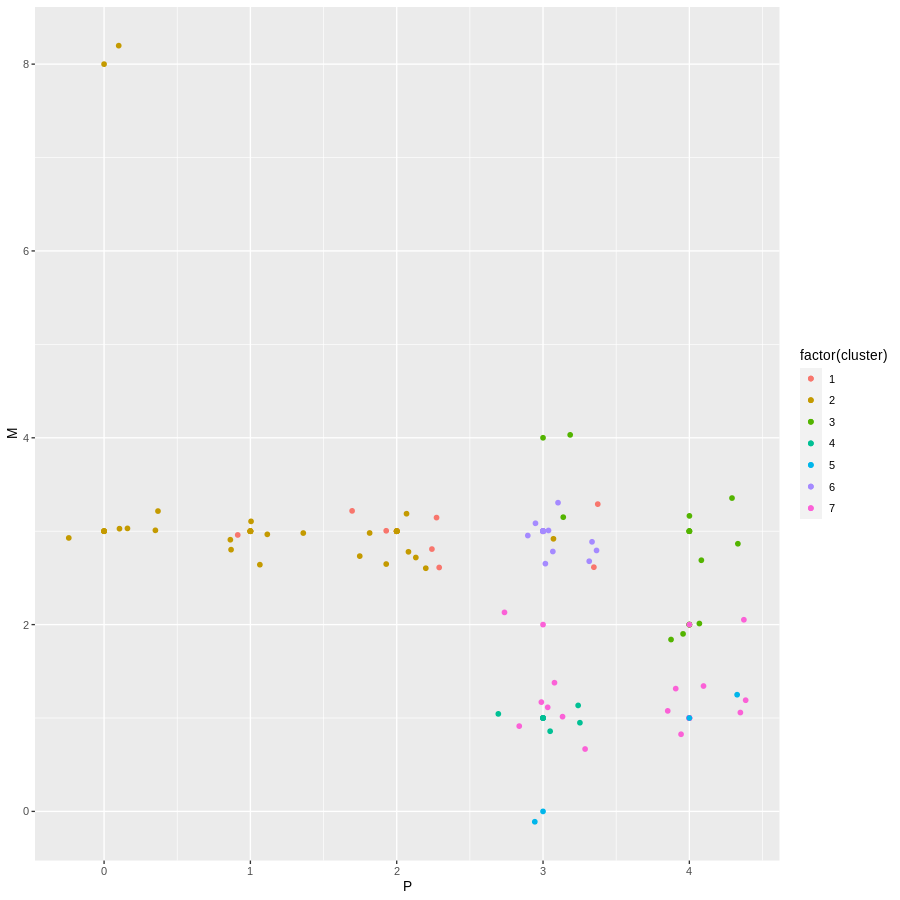

In [32]:
ggplot2::ggplot(df_clust,aes(x=P,y=M,group=cluster,color=factor(cluster))) +
    ggplot2::geom_point() +
    ggplot2::geom_jitter()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</variable><variable id="o@Af-rfK^{O!2%*ikb}G">df_clust</variable></variables><block type="ggplot_plus_R" id="L?XgN~)7%SpJF-y/;UQV" x="111" y="150"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="FnN{M,Y}C/}/P+Hun6$d"><mutation items="2"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="jFdm1{w^waLBjIUvz;Fu"><field name="VAR" id="o@Af-rfK^{O!2%*ikb}G">df_clust</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="}Ih0;eZv3hb(|nyj7m2@"><field name="CODE">aes(x=P,y=M,group=cluster,color=factor(cluster))</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="q`hgoi#V*?Irl!P;kZzI"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="J8j;}oP@L/^L(Xuy7/d7"><mutation items="1"></mutation><field name="VAR" id="N1hiz9Yp3ZeADaJrO;6K">ggplot2</field><field name="MEMBER">geom_jitter</field><data>ggplot2:geom_jitter</data></block></value></block></xml>

-----------------

**QUESTION:**

Which clusters are well separated? 
Which are not?

**ANSWER: (click here to edit)**

No clusters are well separated

-----------------

### Summary

Now consider all your plots and clusters.

-----------------
**QUESTION:**

Do you still think your number of clusters is the best? 
Why or why not?

**ANSWER: (click here to edit)**

*7 is probably not enough clusters. 
We don't get good separation in some plots.
However, if we had more clusters, it would be hard to tell between them based solely on color.*


-----------------

**QUESTION:**

If any of your scatterplot clusters were not well separated, does that concern you?

**ANSWER: (click here to edit)**

*It would if more than 1 was. Some overlap in one dimension is not that concerning when the other two dimensions are well separated.*


-----------------

<!--  -->